# Data Mining and Statistics
## Session 2 - Data and Python
*Peter Stikker - Haarlem, the Netherlands*

----

In the previous session you got used to a bit of basic Python as a programming language. We've seen how you can do most of your Programming 1 from year 1 with Python in just one session. In this session we focus on dealing with data sets. Once you know this, we can finally actually look at analysing the data starting in session 3.

To work with data two very popular libraries will be used: Numpy and Pandas. We'll have a look at how those work but what you'll see here are just tips of icebergs. These libraries are packed with all kinds of useful methods, tricks, etc. 

You have studied before how to work with data, in year 1 you had Databases SQL, and in the Pandas section in this session we'll use that course as a guideline, similar as we used C# in the previous session.

The session finishes with some data cleaning.

Enjoy this session.

p.s. To honor the tradition that a Python course should have a reference to Monty Python, we'll use some Monty Python data as an example in this session :D

# 1. Numpy

In the previous session we discussed different types of collections known to Python core. We saw that an array had the following properties:

1. Are different data types allowed in the sequence? NO
2. Is the order as the data is given or changed? GIVEN
3. Are duplicate values allowed? YES
4. Can we make changes? YES

It was the first type for which we had to import a library. Below an example of a Python array:

In [1]:
import array as arr
my_py_array = arr.array('i', [1, 2, 4, 9, 3, 9])

An indication that this package/library is native to Python is that we didn't need to install it.

However, as you will probably discover one advantage of Python is that many people have created all kinds of useful libraries for others to use. These we will need to install once before we can use them. Numpy is one of those libraries. <a href="https://numpy.org/">Numpy</a> is a library that is almost always listed in a 'top 10 of data mining libraries'. So much so, that often when people talk about an Array in Python they often mean a Numpy Array (or in some cases consider Lists an array).

To install a package/library you could use Anaconda, but also you can use Python. Since we're here anyway lets use Python itself:

In [2]:
#!pip install numpy

*side note: pip is (according to the creator Ian Bicking) a recursive acronym and is short for 'Pip Installs Packages', although I also like the 'Please Install Program'*

Next we can import the library, and lets name it np (which is very common to do)

In [3]:
import numpy as np

Now we can create a Numpy array:

In [4]:
my_np_array = np.array([1, 2, 4, 9, 3, 9])
type(my_np_array)

numpy.ndarray

One big advantage of Numpy Arrays is that they are very fast when do perform computations on them, and have a few build in methods already. For example:

In [5]:
my_np_array.mean()

4.666666666666667

In [6]:
my_np_array.sum()

28

Also calculations to be performed on each element work as expected...

In [7]:
my_np_array * 2

array([ 2,  4,  8, 18,  6, 18])

While if you would do this with a Python Array:

In [8]:
my_py_array * 2

array('i', [1, 2, 4, 9, 3, 9, 1, 2, 4, 9, 3, 9])

# 2. Pandas

If you verified earlier if Numpy is indeed mentioned in 'top 10 of data mining libraries', you'll probably seen in the same lists the library Pandas. Pandas relies heavily on Numpy and extends its features. It will be the library we'll use to import the data and work with the data. 

Its not a Python native library, so if it has not been installed, we can again either use Anaconda or Python itself. A decent explanation on how to install it with Anaconda can be found <a href="https://docs.anaconda.com/anaconda/navigator/tutorials/pandas/#:~:text=Pandas%20appears%20as%20a%20package%20available%20for%20installation.">here</a>, but we'll use Python for now.

However, I don't want it to install every time I run this file, but do want to import it. So....

In [9]:
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')

pandas already installed, only imported


## 2.1. Getting Data

Although Python has a build in csv reader (similar as the file reader you have seen in C#, see Appendix 1 for an example on this), you will often see (and use) the Pandas version. It is just so much easier to work with. Here's an example of how it works.

In [10]:
my_data = pd.read_csv("MontyPython.csv", sep=';', skipinitialspace=True) 

That was easy enough. There are plenty of additional parameters that can be used. See the documentation for more details: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

So, lets have a look at what we got...

In [11]:
my_data.head()

,Scene,textNr,Who,What
0,1,1,ARTHUR,Whoa there!
1,1,2,GUARD #1,Halt! Who goes there?
2,1,3,ARTHUR,"It is I, Arthur, son of Uther Pendragon, from ..."
3,1,4,GUARD #1,Pull the other one!
4,1,5,ARTHUR,I am. And this my trusty servant Patsy. We hav...


This looks nice, but is it a set, an array, or...

In [12]:
type(my_data)

pandas.core.frame.DataFrame

Ah, Pandas has it own datatype known as a DataFrame. This is actually made up of different columns. One way to select a column is simply by its name:


In [13]:
my_data['Scene']

0       1
1       1
2       1
3       1
4       1
       ..
940    36
941    36
942    36
943    36
944    36
Name: Scene, Length: 945, dtype: int64

So, what data type is this then...

In [14]:
type(my_data['Scene'])

pandas.core.series.Series

A Pandas DataFrame is made by a few different Pandas Series.

You might wonder why knowing the datatype is so important. Well, you will probably be using some other libraries and functions in the near future. It is then important to check if the function you are trying to use can deal with the data type you have. 

Of course we can transform the data into another data type. For example:

In [15]:
my_list = my_data['Scene'].tolist()

type(my_list)

list

As mentioned at the start of this section, Pandas also has a csv reader. It is not often used anymore, but if you are interested the Appendix shows how it could be used.

## 2.2. SQL with Pandas

Hope you remember the Databases (SQL) course from year 1. In that course you learned the basics of using SQL to get data in different ways from a database. Also with data mining in Python we want to get data in different ways from a dataset. So lets see how some of those basic SQL commands can be done with Pandas.

First we look at **seeing a single field (column)**. If we wanted to see only the *Scene* field from the *my_data* table, we use:

<font color=blue>SELECT</font> Scene <br>
<font color=blue>FROM</font> my_data

With a Pandas Dataframe we can accomplish this by using:

In [16]:
my_data['Scene']

0       1
1       1
2       1
3       1
4       1
       ..
940    36
941    36
942    36
943    36
944    36
Name: Scene, Length: 945, dtype: int64

or...

In [17]:
my_data.Scene

0       1
1       1
2       1
3       1
4       1
       ..
940    36
941    36
942    36
943    36
944    36
Name: Scene, Length: 945, dtype: int64

With SQL we could **select multiple fields (columns)**, for example to see the *Scene* and *textNr*:

<font color=blue>SELECT</font> Scene, textNr <br>
<font color=blue>FROM</font> my_data

With Pandas Dataframe the same, but note the use of an extra set of brackets.

In [18]:
my_data[['Scene', 'textNr']]

,Scene,textNr
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
940,36,13
941,36,14
942,36,15
943,36,16


Now for **selecting specific records (rows)**. 

We didn't discuss this in year one, and it depends a bit on the SQL dialect you use, but one to show the first five rows would be:

<font color=blue>SELECT</font> * <br>
<font color=blue>FROM</font> my_data <br>
<font color=blue>LIMIT</font> 1, 5

With Pandas we can do the same using:

In [19]:
my_data[0:5]

,Scene,textNr,Who,What
0,1,1,ARTHUR,Whoa there!
1,1,2,GUARD #1,Halt! Who goes there?
2,1,3,ARTHUR,"It is I, Arthur, son of Uther Pendragon, from ..."
3,1,4,GUARD #1,Pull the other one!
4,1,5,ARTHUR,I am. And this my trusty servant Patsy. We hav...


We can of course also **combine the selection of records and fields (rows and columns)**

<font color=blue>SELECT</font> Scene, textNr <br>
<font color=blue>FROM</font> my_data <br>
<font color=blue>LIMIT</font> 1, 5

With Pandas this goes easy with 'iloc':

In [20]:
my_data.iloc[0:5, 0:2]

,Scene,textNr
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


The next SQL clause we discussed was the WHERE, **to filter on a condition for specific records (rows)**. For example, if we only wanted to see the data from 'ARTHUR':

<font color=blue>SELECT</font> Scene, textNr <br>
<font color=blue>FROM</font> my_data <br>
<font color=blue>WHERE</font> Who = <font color=red>'ARTHUR'</font>

To accomplish this with Pandas is a two-step procedure. First we create a pandas series with booleans showing if the condition is true or not:

In [21]:
my_data['Who'] == 'ARTHUR'

0       True
1      False
2       True
3      False
4       True
       ...  
940     True
941    False
942     True
943    False
944     True
Name: Who, Length: 945, dtype: bool

Then we feed this series of booleans in a request to show the data, et voila:

In [22]:
my_data[my_data['Who'] == 'ARTHUR']

,Scene,textNr,Who,What
0,1,1,ARTHUR,Whoa there!
2,1,3,ARTHUR,"It is I, Arthur, son of Uther Pendragon, from ..."
4,1,5,ARTHUR,I am. And this my trusty servant Patsy. We hav...
6,1,7,ARTHUR,Yes!
8,1,9,ARTHUR,What?
...,...,...,...,...
936,36,9,ARTHUR,"In the name of the Lord, we demand entrance to..."
938,36,11,ARTHUR,"If you do not open this door, we shall take th..."
940,36,13,ARTHUR,Walk away. Just ignore them.
942,36,15,ARTHUR,We shall attack at once!


Another topic discussed in SQL lecture 2 from year 1 were the **aggregation functions**. So for example to see the maximum number of text lines:

<font color=blue>SELECT</font> <font color=magenta>COUNT</font>(textNr) <br>
<font color=blue>FROM</font> my_data <br>

With Pandas...

In [23]:
my_data['textNr'].count()

945

There are a lot of aggregate functions we can apply, the four basic ones:

* min for minimum
* max for maximum 
* mean for average
* count for the number of i.e. count

These and a few others can also quickly be obtained on all numeric fields using the *describe* method.

In [24]:
my_data.describe()

,Scene,textNr
count,945.000000,945.000000
mean,18.642328,26.815873
std,12.530856,20.055589
min,1.000000,1.000000
25%,5.000000,11.000000
50%,24.000000,23.000000
75%,31.000000,38.000000
max,36.000000,98.000000


A simple other SQL command we discussed was the ORDER BY, to uhm well **order (or sort) the results**. For example to order by *What* descending:

<font color=blue>SELECT</font> * <br>
<font color=blue>FROM</font> my_data <br>
<font color=blue>ORDER BY</font> What <font color=grey>DESC</font>

As you probably suspected, this can also be done with Pandas...

In [25]:
my_data.sort_values('What', ascending=False)

,Scene,textNr,Who,What
297,8,35,MUTTERING GUARDS,ce labon a bunny do wha? un cadeau? a present!...
273,8,11,OTHER GUARDS,[Laughing]
409,11,45,GALAHAD,Zoot!
9,1,10,GUARD #1,You've got two empty halves of coconut and you...
591,28,6,HERBERT,You've come to rescue me!
...,...,...,...,...
933,36,6,GUARD,"'Allo, daffy English kaniggets and Monsieur Ar..."
264,8,2,GUARD,'Allo! Who is zis?
842,34,11,MAYNARD,'... the Castle of uuggggggh'.
826,33,58,BROTHER,"""And the Lord spake, saying, 'First shalt thou..."


The last SQL clause to discuss is the GROUP BY, since we are often interested in **results per group**. For example we could be interested in the results per actor (Who) and have a few simple counts of texts each had.

In SQL that would look like:

<font color=blue>SELECT</font> Who, <font color=magenta>COUNT</font>(*) <br>
<font color=blue>FROM</font> my_data <br>
<font color=blue>GROUP BY</font> Who <br>
<font color=blue>ORDER BY</font> 2 <font color=grey>DESC</font>

With Pandas we could make one long chain of functions for this, but lets do it step by step first.

To let Pandas know we want to group on something, we can use the 'groupby' method:

In [26]:
gr_who = my_data.groupby("Who")
gr_who

This in itself is just storing the data of each group seperately. Now we can get our counts per group using this.

In [27]:
who_txt_counts = gr_who['textNr'].count()
who_txt_counts.head()

Who
ALL                     8
ALL HEADS               5
ARTHUR                190
ARTHUR and BEDEMIR      1
ARTHUR and PARTY        2
Name: textNr, dtype: int64

Now we can sort this:

In [28]:
who_txt_counts_sorted = who_txt_counts.sort_values(ascending=False)
who_txt_counts_sorted.head()

Who
ARTHUR       190
LAUNCELOT     64
FATHER        57
GALAHAD       53
BEDEMIR       48
Name: textNr, dtype: int64

And yes, we could have combined all in one long chain of code:

In [29]:
my_data.groupby("Who")['textNr'].count().sort_values(ascending=False).head()

Who
ARTHUR       190
LAUNCELOT     64
FATHER        57
GALAHAD       53
BEDEMIR       48
Name: textNr, dtype: int64

If you do like to use this chaining, but want to somewhat structure it, you can use a set of parenthesis around the entire thing, and then you can use a new line for each new part of the chain:

In [30]:
(
    my_data
    .groupby("Who")['textNr']
    .count()
    .sort_values(ascending=False)
    .head()
)

Who
ARTHUR       190
LAUNCELOT     64
FATHER        57
GALAHAD       53
BEDEMIR       48
Name: textNr, dtype: int64

## 2.3. Exercise

For this exercise we'll use a datafile that actually comes from another program: R. To understand what the variables mean, you might want to check the documentation about the file, available <a href="https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/ChickWeight">here</a>.

Shout-out to Mr. Van der Meer for the inspiration for this exercise.

*a) Load the chickweight.csv file as a pandas dataframe, and show the first five records*

In [31]:
chick_data = pd.read_csv("chickweight.csv", sep=',', skipinitialspace=True)
chick_data.head()
#print(chick_data)

,rownum,weight,Time,Chick,Diet
0,1,42,0,1,1
1,2,51,2,1,1
2,3,59,4,1,1
3,4,64,6,1,1
4,5,76,8,1,1


*b) Show from row numbers 10 to 15 the weight, and diet*

In [32]:
#my_chick_data.iloc[10:16][['weight','Diet']]
chick_data.iloc[10:16, [1,4]]


,weight,Diet
10,199,1
11,205,1
12,40,1
13,49,1
14,58,1
15,72,1


*c) Show the fields/columns weight and time of chick 1.*

In [33]:
chick_data[chick_data['Chick']==1][['weight','Time']]

,weight,Time
0,42,0
1,51,2
2,59,4
3,64,6
4,76,8
5,93,10
6,106,12
7,125,14
8,149,16
9,171,18


*d) Determine the maximum weight for each diet*

In [34]:
chick_data.groupby("Diet")['weight'].max()

Diet
1    305
2    331
3    373
4    322
Name: weight, dtype: int64

*e) Determine the max time per chicken. Sort the results low to high. Which chickens seems not to have made it to the last time of measuring?*

In [35]:
chick_data.groupby('Chick')['Time'].max().sort_values()

Chick
18     2
16    12
15    14
44    18
8     20
1     21
30    21
31    21
32    21
33    21
34    21
35    21
36    21
38    21
29    21
39    21
40    21
41    21
42    21
43    21
45    21
46    21
47    21
48    21
37    21
28    21
25    21
26    21
2     21
3     21
4     21
5     21
6     21
7     21
9     21
10    21
11    21
27    21
12    21
14    21
17    21
19    21
20    21
21    21
22    21
23    21
24    21
49    21
13    21
50    21
Name: Time, dtype: int64

*f) What are the chick numbers of those with the maximum weight for each diet? (note you might need to search the internet a bit for a solution, hint: transform...)*

In [36]:
#Maximum weight for each diet.
chick_data.groupby('Diet')['weight'].max()

Diet
1    305
2    331
3    373
4    322
Name: weight, dtype: int64

*g) Show the data of the chicks that did not reach the last time period. Show all their results for their last time period. (note use again the transform)*

In [37]:
data = chick_data.groupby(['Chick'])['Time'].transform(max) == chick_data['Time']
chick_data[data][chick_data[data]['Time'] < 21]


,rownum,weight,Time,Chick,Diet
94,95,125,20,8,1
174,175,68,14,15,1
181,182,54,12,16,1
195,196,35,2,18,1
505,506,146,18,44,4


For a decent explanation of transform, see: https://pbpython.com/pandas_transform.html

**Final note on SQL with Python**

It is also possible to use true SQL with Python and connect to a database. This is beyond the scope of this course. If you are interested there is a free MOOC available on Coursera.org from IBM that covers this: https://www.coursera.org/learn/sql-data-science/home/welcome. 

# 3. Data Cleaning

You might have heard about the phrase 'garbage in, garbage out'. It means that if the data is not 'good' you cannot get reliable results. 

Data Cleaning is a study in itself, and some claim it takes about 80% of the time of the data scientist. This claim of 80% is perhaps a bit exagerated (see for example <a href="https://blog.ldodds.com/2020/01/31/do-data-scientists-spend-80-of-their-time-cleaning-data-turns-out-no/">here</a>), but that a lot of time should be spend on this is not debated by anyone in the field.

How to clean your data will unfortunately depend on your specific situation. In this chapter just a few techniques are discussed, but there is a lot more. A good starting point to get some more ideas is: https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4

Okay, first lets get some data:

In [38]:
survey_df = pd.read_csv("StudentStatistics.csv", sep=';').rename(str.lower, axis='columns') 
survey_df.head()

,respnr,location,oaa_objcourse,oaa_objclass,oaa_courseexec,oaa_relactobj,oaa_relactexa,oaa_relobjexa,oaa_learprocact,oaa_learprocprep,...,mix_intdiscus,mix_intprep,mix_intexcel,over_grade,gen_gender,gen_age,gen_secschool,gen_classes,gen_numbersubj,gen_time
0,1.0,Rotterdam,Fully Disagree,Fully Disagree,Fully Disagree,Disagree,Fully Disagree,Fully Disagree,Fully Disagree,Fully Disagree,...,Not at all,not so much,not so much,20.0,Female,22.0,NaN,NaN,Fully agree,20 < 30
1,2.0,Haarlem,Disagree,Disagree,NaN,Fully Disagree,Neither disagree nor agree,Agree,Disagree,Neither disagree nor agree,...,not so much,somewhat,somewhat,50.0,Male,NaN,The Netherlands,6.0,Disagree,10 < 20
2,3.0,Diemen,Fully agree,Fully agree,Agree,Fully agree,Fully agree,Fully agree,Fully agree,Agree,...,Very much,somewhat,somewhat,80.0,Male,37.0,Africa,7.0,Agree,10 < 20
3,4.0,Rotterdam,Fully Disagree,Neither disagree nor agree,Disagree,Neither disagree nor agree,Neither disagree nor agree,Fully Disagree,Fully Disagree,Neither disagree nor agree,...,NaN,neutral,neutral,15.0,Female,24.0,The Netherlands,6.0,Agree,10 < 20
4,5.0,Haarlem,Disagree,Agree,Fully Disagree,Neither disagree nor agree,Fully agree,Fully agree,Neither disagree nor agree,Fully agree,...,Not at all,somewhat,Very much,40.0,Male,19.0,The Netherlands,7.0,Fully agree,10 < 20


To get a quick impression of which columns there actually are:

In [39]:
survey_df.columns

Index(['respnr', 'location', 'oaa_objcourse', 'oaa_objclass', 'oaa_courseexec',
       'oaa_relactobj', 'oaa_relactexa', 'oaa_relobjexa', 'oaa_learprocact',
       'oaa_learprocprep', 'oaa_learprocdisc', 'oaa_learproclect',
       'oaa_learprocexe', 'oaa_setupmotiv', 'oaa_usefulnessstat', 'mat_burns',
       'mat_baarda', 'mat_laerd', 'mat_powerpoint', 'mat_addmaterial',
       'mat_excel', 'mat_announcements', 'bb_own', 'bb_motivating',
       'bb_userfr', 'bb_suffict', 'teach_motivate', 'teach_linktheory',
       'teach_stimask', 'teach_avail', 'teach_stimdisc', 'teach_partic',
       'teach_comp', 'mix_adeq1', 'mix_adeq1_open', 'mix_nrclass', 'mix_nract',
       'mix_adeq2', 'mix_adeq2_open', 'mix_intclass', 'mix_intdiscus',
       'mix_intprep', 'mix_intexcel', 'over_grade', 'gen_gender', 'gen_age',
       'gen_secschool', 'gen_classes', 'gen_numbersubj', 'gen_time'],
      dtype='object')

An explanation of each variable is usually also available (or should be). If you haven't collected the data yourself a so-called code book is very useful. This should explain what each variable means and the different options that were available for each variable.

## 3.1. Setting the proper dtype

Lets see what data types each column contains:

In [40]:
survey_df.dtypes

respnr                float64
location               object
oaa_objcourse          object
oaa_objclass           object
oaa_courseexec         object
oaa_relactobj          object
oaa_relactexa          object
oaa_relobjexa          object
oaa_learprocact        object
oaa_learprocprep       object
oaa_learprocdisc       object
oaa_learproclect       object
oaa_learprocexe        object
oaa_setupmotiv         object
oaa_usefulnessstat     object
mat_burns              object
mat_baarda             object
mat_laerd              object
mat_powerpoint         object
mat_addmaterial        object
mat_excel              object
mat_announcements      object
bb_own                 object
bb_motivating          object
bb_userfr              object
bb_suffict             object
teach_motivate         object
teach_linktheory       object
teach_stimask          object
teach_avail            object
teach_stimdisc         object
teach_partic           object
teach_comp             object
mix_adeq1 

So most of them are 'object' which indicates a mix of text and numbers. This is probably the 'slowest' data type to work with. So lets change them to what they should be.

The *location* is our first object column. So lets see what the results looked like:

In [41]:
survey_df['location'].unique()

array(['Rotterdam', 'Haarlem', 'Diemen'], dtype=object)

Only three options. This appears to be a so-called nominal variable. We have clear categories and there is no logical order in the options. 

Just so we can compare later if this is indeed slower, lets do a group by on location and sum the age for each location. 

In [42]:
%%timeit
survey_df.groupby('location')['gen_age'].sum()

283 µs ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Now lets change the dtype to *categorical*:

In [43]:
survey_df['location'] = pd.Categorical(survey_df['location'])
survey_df['location'].dtypes

CategoricalDtype(categories=['Diemen', 'Haarlem', 'Rotterdam'], ordered=False)

Note that the categories are in alphabetical order. Is this now faster?



In [44]:
%%timeit
survey_df.groupby('location')['gen_age'].sum()

264 µs ± 19.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The results should be faster now.

The next 'object' is *oaa_objcourse*. First check which scores were given:

In [45]:
survey_df['oaa_objcourse'].unique()

array(['Fully Disagree', 'Disagree', 'Fully agree',
       'Neither disagree nor agree', 'Agree'], dtype=object)

This is a so-called ordinal variable; a clear logical order in the possible values. We need to specify the values now, and set ordered to True:

In [46]:
survey_df['oaa_objcourse'] = pd.Categorical(survey_df['oaa_objcourse'], categories = ["Fully Disagree", "Disagree", "Neither disagree nor agree", "Agree", "Fully agree"], ordered = True)

In [47]:
survey_df['oaa_objcourse'].dtypes

CategoricalDtype(categories=['Fully Disagree', 'Disagree', 'Neither disagree nor agree',
                  'Agree', 'Fully agree'],
, ordered=True)

Hopefully you get the idea now. We could perhaps do a few columns in one go if they have the same values, but we'll leave that as an exercise.

## 3.2. Checking the values and counts

A very simple check on the data is to produce a frequency table of each variable. It will show for each unique value the number of times it appears in the column. With this you can quickly see if there is perhaps a strange value, or a constant, or an unusual/unexpected high or low count.

A basic frequency count can be obtained using **value_counts()**:

In [48]:
survey_df['oaa_objcourse'].value_counts().sort_index()

Fully Disagree                 9
Disagree                      13
Neither disagree nor agree    11
Agree                         13
Fully agree                    9
Name: oaa_objcourse, dtype: int64

Here is another example on the column *gen_classes*. This is the number of classes a student attended:

In [49]:
survey_df['gen_classes'].value_counts().sort_index()

0.0    2
1.0    3
2.0    5
3.0    6
4.0    7
5.0    5
6.0    7
7.0    7
Name: gen_classes, dtype: int64

Notice anything strange? 

Well, it seems we have two students who did not attend any class. Lets take a closer look at them:

In [50]:
survey_df[survey_df['gen_classes'] == 0]

,respnr,location,oaa_objcourse,oaa_objclass,oaa_courseexec,oaa_relactobj,oaa_relactexa,oaa_relobjexa,oaa_learprocact,oaa_learprocprep,...,mix_intdiscus,mix_intprep,mix_intexcel,over_grade,gen_gender,gen_age,gen_secschool,gen_classes,gen_numbersubj,gen_time
23,24.0,Diemen,Fully agree,Neither disagree nor agree,Neither disagree nor agree,Disagree,Fully agree,Fully agree,Agree,Neither disagree nor agree,...,somewhat,neutral,somewhat,NaN,Male,28.0,Asia,0.0,Neither disagree nor agree,Less than 10 hours
43,44.0,Haarlem,Disagree,Disagree,Disagree,Fully Disagree,Agree,Neither disagree nor agree,Fully Disagree,Fully Disagree,...,not so much,somewhat,Very much,40.0,Male,20.0,The Netherlands,0.0,Fully agree,20 < 30


Hmmm, very odd. Even though they did not attend any classes, these two students did have a variety of opinions on everything including the classes. How can you have an opinion on a class if you never attended it?

We could decide to remove these two students from our data. If you decide to remove or change data always report this and explain why you felt it was appropriate to do so.

I usually would make a new copy of the data just in case I regret my decision later.

In [51]:
survey_df2 = survey_df[survey_df['gen_classes'] != 0]

In [52]:
survey_df2['gen_classes'].value_counts().sort_index()

1.0    3
2.0    5
3.0    6
4.0    7
5.0    5
6.0    7
7.0    7
Name: gen_classes, dtype: int64

We can continue with all of the variables, and would come across:

In [53]:
survey_df2['gen_age'].value_counts().sort_index()

18.0     5
19.0     7
20.0     7
21.0     5
22.0     3
23.0     2
24.0     3
25.0     1
26.0     2
27.0     1
28.0     1
29.0     2
30.0     1
37.0     1
119.0    1
Name: gen_age, dtype: int64

Notice something odd again? You are never too old to learn, but an age of 119 is not likely. Perhaps a typo was made and 19 was meant. If you have the original surveys we could double check, but we don't. Unfortunately we should make this a missing value.

Note that we don't want to remove the entire row now, just replace the value.

In [54]:
survey_df2['gen_age'] = survey_df2['gen_age'].replace(119, np.nan)

C:\Users\steph\AppData\Local\Temp/ipykernel_9716/311869519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df2['gen_age'] = survey_df2['gen_age'].replace(119, np.nan)


We get a warning, but a warning is not the same as an error. It has actually worked:

In [55]:
survey_df2['gen_age'].value_counts().sort_index()

18.0    5
19.0    7
20.0    7
21.0    5
22.0    3
23.0    2
24.0    3
25.0    1
26.0    2
27.0    1
28.0    1
29.0    2
30.0    1
37.0    1
Name: gen_age, dtype: int64

Again, we need to be clear in our report that we made this change.

## 3.3. A Visual Inspection

A visual inspection might also be helpful. For categorical data a bar-chart is useful. Pandas has a plot function (which is actually based on another library Matplotlib's PyPlot)

<AxesSubplot:>

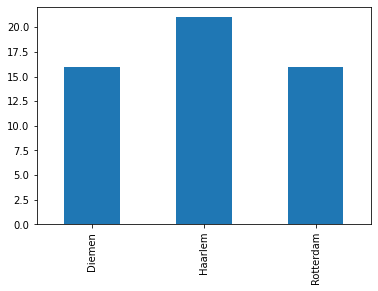

In [56]:
my_counts = survey_df2['location'].value_counts().sort_index()
my_counts.plot(kind = 'bar')

Nothing seems out of the ordinary. We made this chart just for a quick inspection. If we wanted to make it look a bit nicer, we can probably better use the Pyplot library from Matplotlib. This is usually abbreviated to 'plt':

In [57]:
try:
    import matplotlib.pyplot as plt
    print('matplotlib already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('matplotlib was not installed, installed and imported')

matplotlib already installed, only imported


Now we can add all kinds of things, for example:

(array([0, 1, 2]),
 [Text(0, 0, 'Diemen'), Text(1, 0, 'Haarlem'), Text(2, 0, 'Rotterdam')])

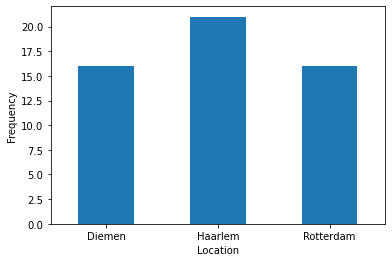

In [58]:
my_counts.plot(kind = 'bar')
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.xticks(rotation = 0)

For numerical fields (columns/variables) we can use something known as a box plot. Pandas also has this available for us in their <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html">boxplot</a> method.

<AxesSubplot:>

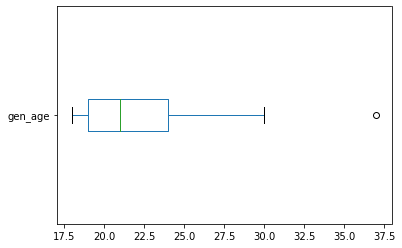

In [59]:
survey_df2.boxplot('gen_age', grid = False, vert = False)

So, what do we see in this diagram?

* The vertical line on the left is placed at the minimum value (excluding outliers). So the minimum age was 18.
* The box in the middle starts at the so-called first quartile. In this example at 19. This indicates that 25% of all students were 19 or younger.
* The vertical line in the box is placed at the median. In this example at 21. This indicates that 50% of all students were 21 or younger.
* The end of the box is drawn at the third quartile. In this example at 24. This indicates that 75% of all students were 21 or younger.
* The vertical line on the right is placed at the maximum value, excluding outliers. So the maximum age (not counting outliers) was 30
* The dot at the far right (O) is a so called outlier. Its a score that seems to be quite unusual.

When cleaning your data it are those outliers that are to be looked out for. This could indicate an error in measurement, but not necesairly. An outlier can have quite a big effect on the results later, when we start analyzing the data. 

Again, if you decide on removing an outlier, make sure you indicate this in your report with an explanation on why you felt it was justified to do so.

If you are curious an outlier is a datapoint that is 1.5 times the Inter Quartile Range (IQR) below the first or above the third quartile. The IQR is the difference between the third and first quartile. In the example the IQR = 24 - 19 = 5. So any score below 19 - 1.5 x 5 = 19 - 7.5 = 11.5 would be considered an outlier, or any score above 24 + 1.5 x 5 = 24 + 7.5 = 31.5. The 37 is therefor indeed correctly an outlier.

## 3.4. Exercises

**Exercise 1**

*1a) Change the dtype for the field mix_intexcel, first check the scores so you can determine the proper dtype for it*

In [60]:
# code to see the different options that were used for this variable
survey_df2['mix_intexcel'].dtypes
survey_df2['mix_intexcel'].unique()

array(['not so much', 'somewhat', 'neutral', 'Very much', nan,
       'Not at all'], dtype=object)

In [61]:
# code to change the dtype
survey_df2['mix_intexcel'] = pd.Categorical(survey_df2['mix_intexcel'], categories = ["Not at all", 'not so much', 'neutral', 'somewhat', 'Very much'], ordered = True )
survey_df2['mix_intexcel'].dtypes

C:\Users\steph\AppData\Local\Temp/ipykernel_9716/892203443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df2['mix_intexcel'] = pd.Categorical(survey_df2['mix_intexcel'], categories = ["Not at all", 'not so much', 'neutral', 'somewhat', 'Very much'], ordered = True )


CategoricalDtype(categories=['Not at all', 'not so much', 'neutral', 'somewhat',
                  'Very much'],
, ordered=True)

*1b) Check the counts of the mix_intexcel field*

In [62]:
survey_df2['mix_intexcel'].value_counts().sort_index()

Not at all      3
not so much     3
neutral        16
somewhat       14
Very much       9
Name: mix_intexcel, dtype: int64

*1c) Create an appropriate diagram to visualise the counts of mix_intexcel*

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Not at all'),
  Text(1, 0, 'not so much'),
  Text(2, 0, 'neutral'),
  Text(3, 0, 'somewhat'),
  Text(4, 0, 'Very much')])

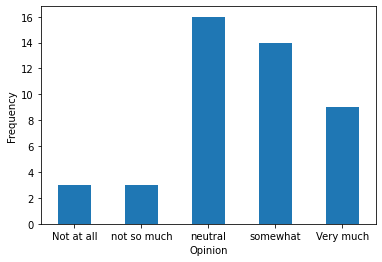

In [63]:
graph = survey_df2['mix_intexcel'].value_counts().sort_index()
graph.plot(kind = 'bar')
plt.xlabel("Opinion")
plt.ylabel("Frequency")
plt.xticks(rotation = 0)

**Exercise 2: Automating the Process**

Below is some code to adjust the dtype for all fields that use the fully disagree to fully agree scale. 

Inspect the code carefully so you understand what it does.

In [64]:
#Create a real copy and not a reference in memory.
survey_df3 = survey_df2.copy()

#The labels we want to use
labels = ["Fully Disagree", "Disagree", "Neither disagree nor agree", "Agree", "Fully agree", np.nan]

#The fields in the data frame
fields = survey_df3.columns

#Loop over each field
for field in fields:
    
    #check if the data type is 'object'
    if survey_df3[field].dtype.name == 'object':
        
        # get the unique values of the field
        values = survey_df3[field].unique()
        
        # check if those values are in our labels
        allin = True
        n_values = len(values)
        i = 0
        while allin and i < n_values:
            allin = values[i] in labels
            i = i + 1
        
        # only if the values are in the labels adjust the dtype
        if allin:
            survey_df3[field] = pd.Categorical(survey_df3[field], categories = ["Fully Disagree", "Disagree", "Neither disagree nor agree", "Agree", "Fully agree"], ordered = True)
            
#Check if it worked
survey_df3.dtypes

respnr                 float64
location              category
oaa_objcourse         category
oaa_objclass          category
oaa_courseexec        category
oaa_relactobj         category
oaa_relactexa         category
oaa_relobjexa         category
oaa_learprocact       category
oaa_learprocprep      category
oaa_learprocdisc      category
oaa_learproclect      category
oaa_learprocexe       category
oaa_setupmotiv        category
oaa_usefulnessstat    category
mat_burns               object
mat_baarda              object
mat_laerd               object
mat_powerpoint          object
mat_addmaterial         object
mat_excel               object
mat_announcements       object
bb_own                category
bb_motivating         category
bb_userfr             category
bb_suffict            category
teach_motivate        category
teach_linktheory      category
teach_stimask         category
teach_avail           category
teach_stimdisc        category
teach_partic          category
teach_co

*2a) Create a similar code for the variables that start with 'mat_' and run it.*

In [65]:
# code to check the different options that were used
survey_df3['mat_burns'].unique()

array(['Not at all', nan, 'neutral', 'not so much', 'Very much',
       'somewhat'], dtype=object)

In [66]:
# code to change the dtypes
burns_data = survey_df3.copy()

#the choices
options = ["Not at all", "not so much", "neutral", "somewhat", "Very much", np.nan ]

fields = burns_data.columns

#the for loop
for field in fields:
    
    #check if the datatypes is "Object"
    if burns_data[field].dtype.name == 'object':
        
        #get the unique values of the field
        values = burns_data[field].unique()

        #check if those values in our labels
        allin = True
        n_values = len(values)
        i = 0
        while allin and i < n_values:
            allin = values[i] in options
            i = i + 1
        
        #only if the values are in the labels adjust the dtype
        if allin:
            burns_data[field] = pd.Categorical(burns_data[field], categories = ["Not at all", "not so much", "neutral", "somewhat", "Very much"], ordered = True)


burns_data.dtypes

respnr                 float64
location              category
oaa_objcourse         category
oaa_objclass          category
oaa_courseexec        category
oaa_relactobj         category
oaa_relactexa         category
oaa_relobjexa         category
oaa_learprocact       category
oaa_learprocprep      category
oaa_learprocdisc      category
oaa_learproclect      category
oaa_learprocexe       category
oaa_setupmotiv        category
oaa_usefulnessstat    category
mat_burns             category
mat_baarda            category
mat_laerd             category
mat_powerpoint        category
mat_addmaterial       category
mat_excel             category
mat_announcements     category
bb_own                category
bb_motivating         category
bb_userfr             category
bb_suffict            category
teach_motivate        category
teach_linktheory      category
teach_stimask         category
teach_avail           category
teach_stimdisc        category
teach_partic          category
teach_co

*2b) Create a codeblock to show the frequencies of all category dtypes in the dataframe*

In [67]:
df = burns_data.columns

for field in df:
    if burns_data[field].dtype.name == 'category':
        print(field)
        print(burns_data[field].value_counts().sort_index())
        print()

location
Diemen       16
Haarlem      21
Rotterdam    16
Name: location, dtype: int64

oaa_objcourse
Fully Disagree                 9
Disagree                      12
Neither disagree nor agree    11
Agree                         13
Fully agree                    8
Name: oaa_objcourse, dtype: int64

oaa_objclass
Fully Disagree                 5
Disagree                      14
Neither disagree nor agree    13
Agree                         13
Fully agree                    8
Name: oaa_objclass, dtype: int64

oaa_courseexec
Fully Disagree                13
Disagree                      13
Neither disagree nor agree    10
Agree                          7
Fully agree                    6
Name: oaa_courseexec, dtype: int64

oaa_relactobj
Fully Disagree                 4
Disagree                       9
Neither disagree nor agree    17
Agree                         11
Fully agree                   12
Name: oaa_relactobj, dtype: int64

oaa_relactexa
Fully Disagree                 4
Disagree  

*2c) Create a codeblock that shows a bar-chart if the dtype is categorical, and a box-plot if it is a float.*

respnr


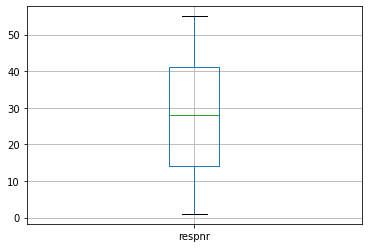

location


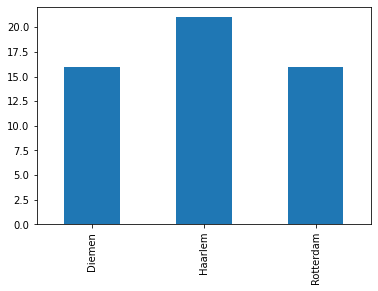

oaa_objcourse


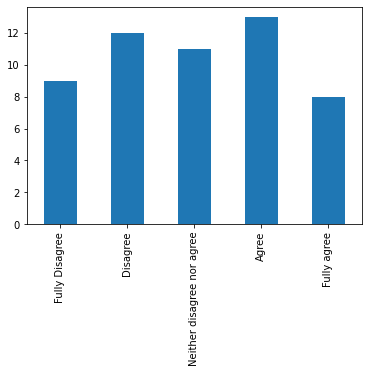

oaa_objclass


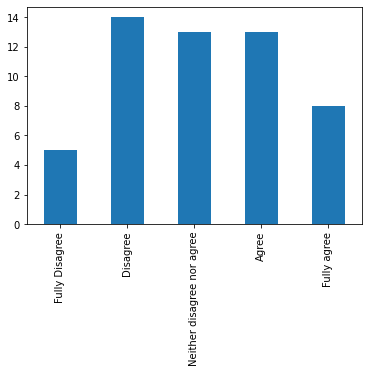

oaa_courseexec


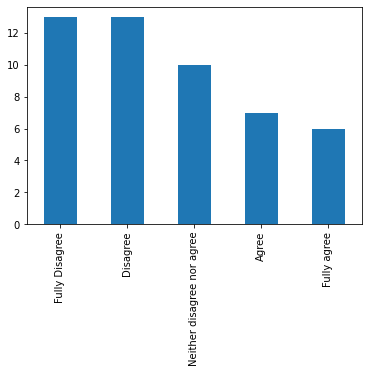

oaa_relactobj


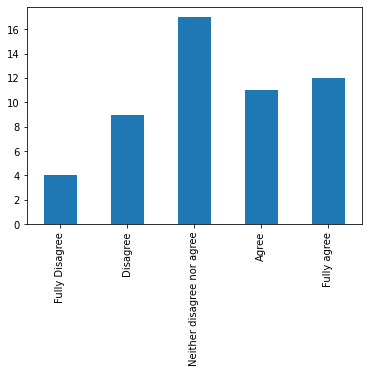

oaa_relactexa


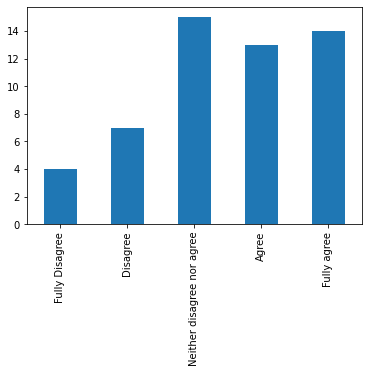

oaa_relobjexa


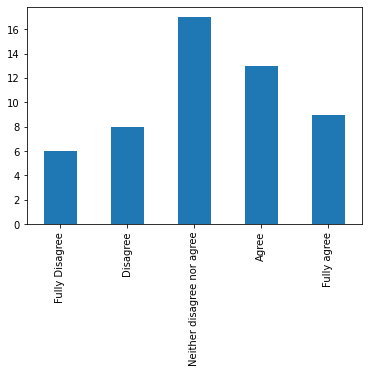

oaa_learprocact


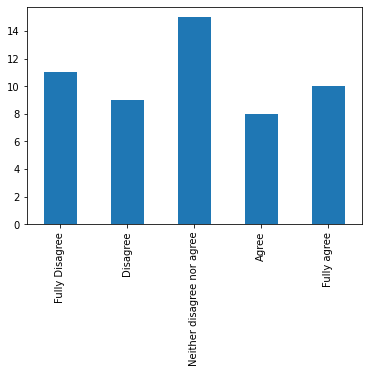

oaa_learprocprep


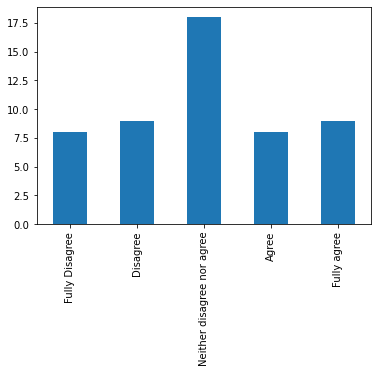

oaa_learprocdisc


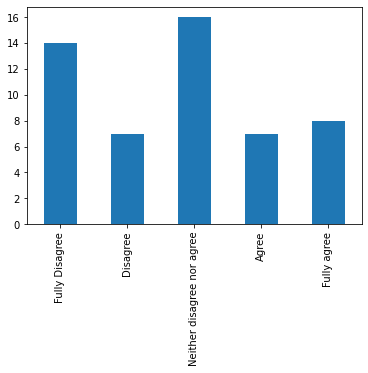

oaa_learproclect


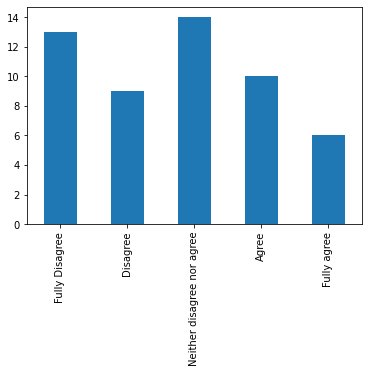

oaa_learprocexe


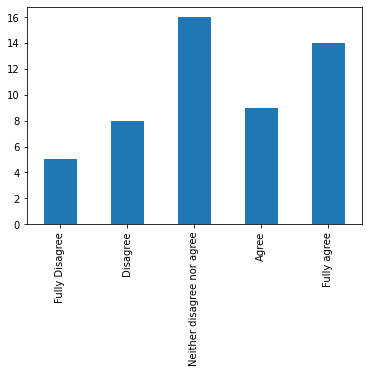

oaa_setupmotiv


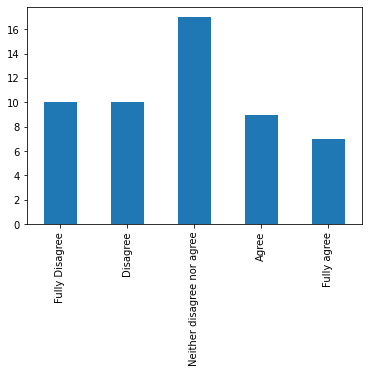

oaa_usefulnessstat


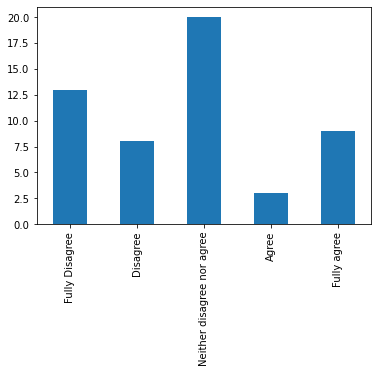

mat_burns


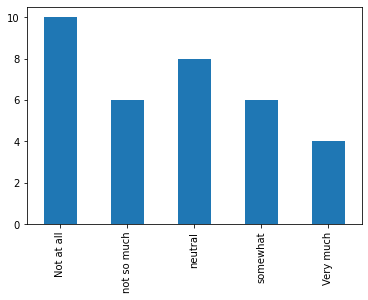

mat_baarda


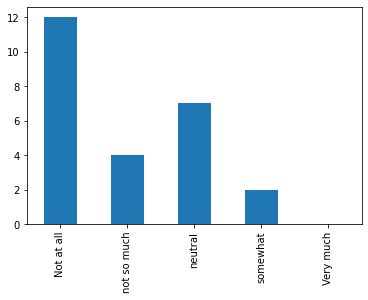

mat_laerd


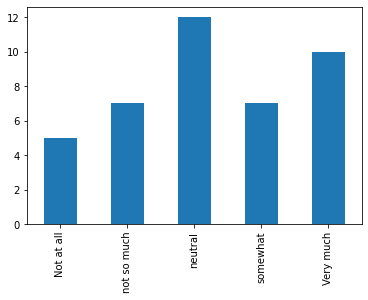

mat_powerpoint


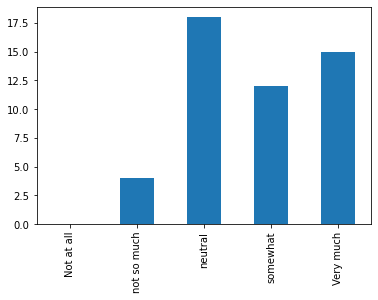

mat_addmaterial


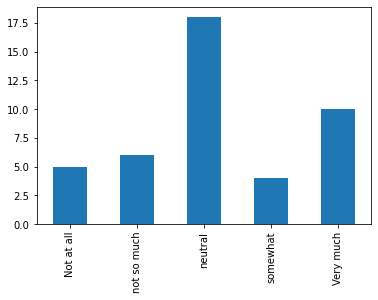

mat_excel


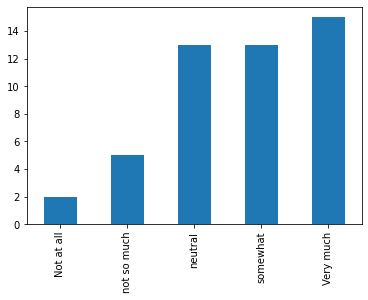

mat_announcements


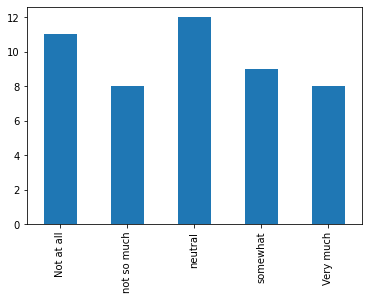

bb_own


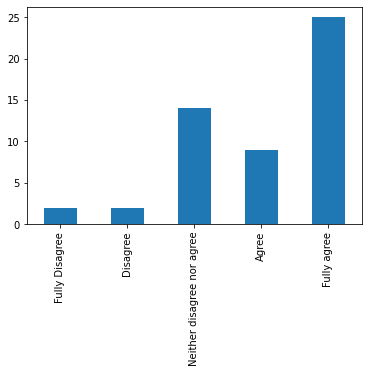

bb_motivating


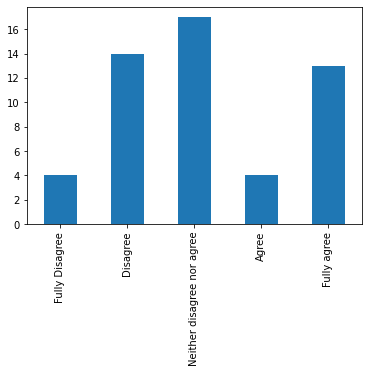

bb_userfr


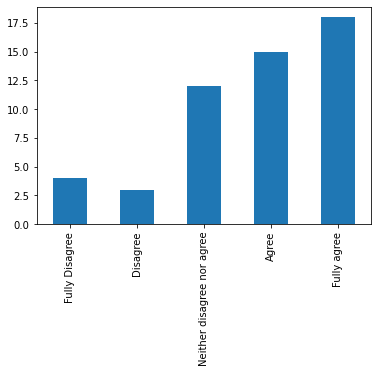

bb_suffict


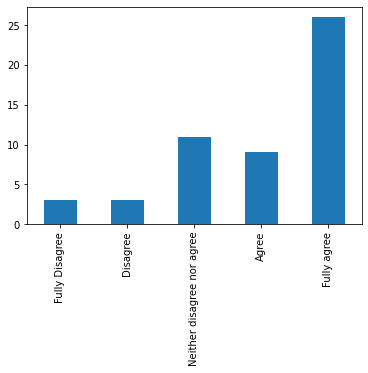

teach_motivate


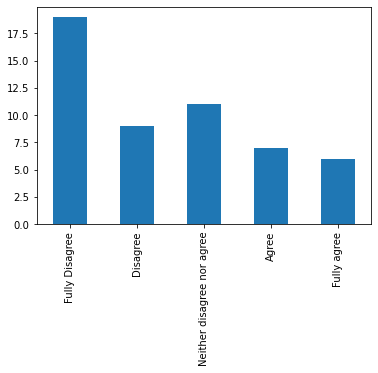

teach_linktheory


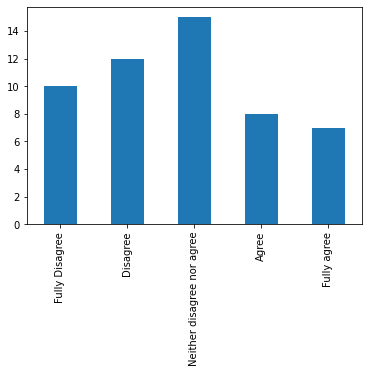

teach_stimask


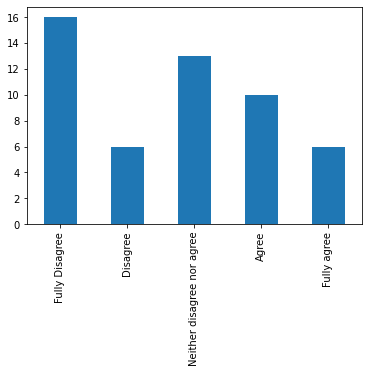

teach_avail


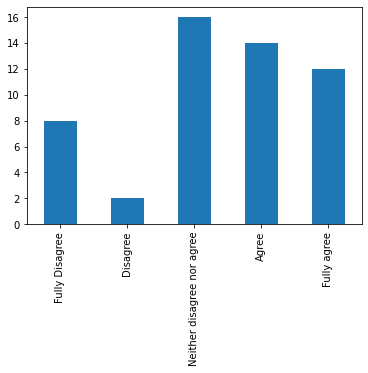

teach_stimdisc


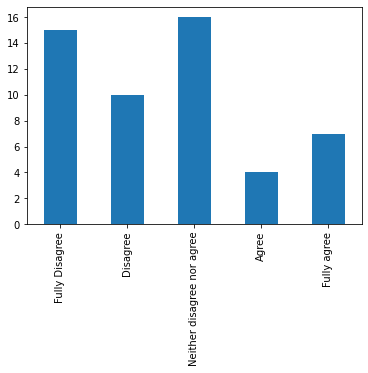

teach_partic


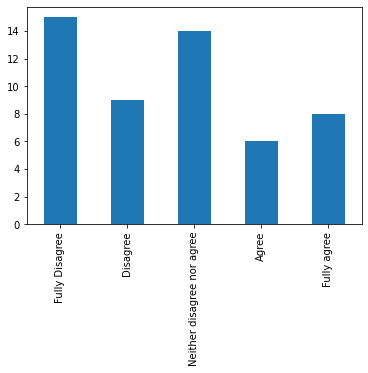

teach_comp


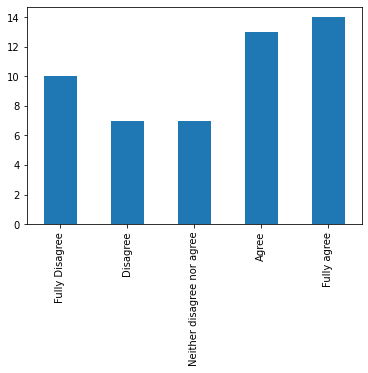

mix_adeq1


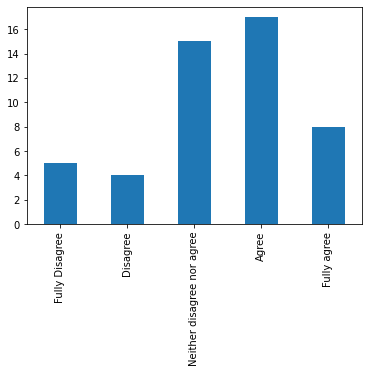

mix_adeq2


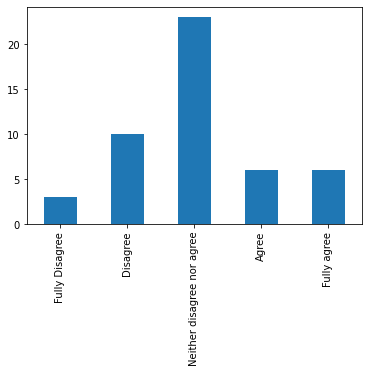

mix_intclass


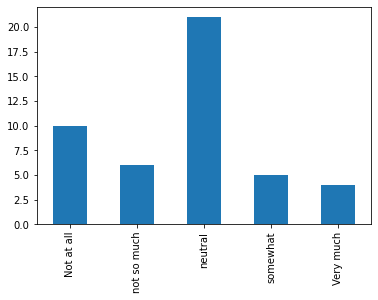

mix_intdiscus


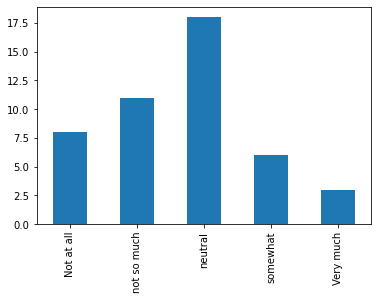

mix_intprep


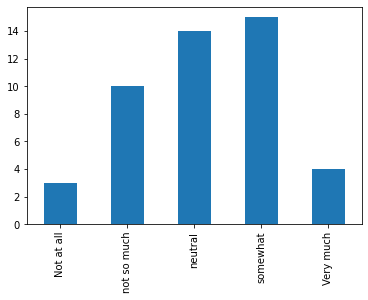

mix_intexcel


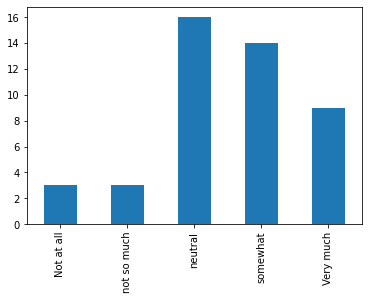

over_grade


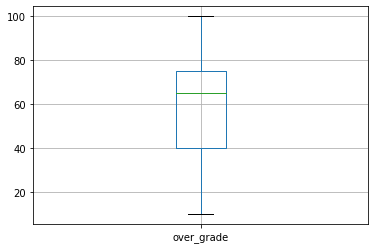

gen_age


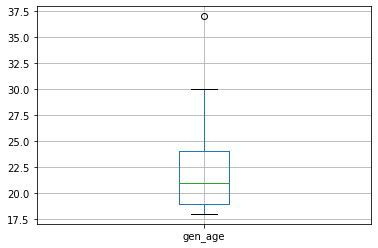

gen_classes


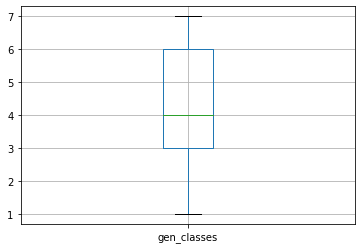

gen_numbersubj


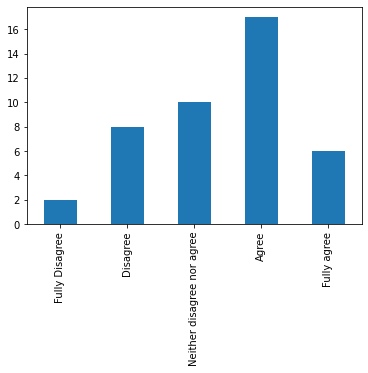

In [87]:
graph_data = burns_data.columns
#print(graph_data)

for field in graph_data:
    catergory = burns_data[field].dtype.name == 'category'
    numb = burns_data[field].dtype.name == 'float64'
    columnName= burns_data[field].name

    #if category print as bar
    if catergory:
        print(columnName)
        amount = burns_data[field].value_counts().sort_index()
        amount.plot(kind = 'bar')
    #if float print as boxplot
    if numb:
        print(columnName)
        burns_data.boxplot(field, grid = True, vert = True)

    plt.show()



**Exercise 3: Convert to Numbers**

Although we already changed for *oaa_objcourse* the dtype from *object* to *category* it can be helpful to change it to numeric values. If we use a coding of for example 0 = fully disagree, 1 = disagree,...4 = fully agree. 

*3a) Try to change the *oaa_objcourse* field to a numeric one (hint: use replace, or codes). Check if coding indeed assigned fully disagree to 0.*

In [89]:
# USING REPLACE
copy_survey = survey_df.copy()

copy_survey['oaa_objcourse'].replace(
    ["Fully Disagree", "Disagree", "Neither disagree nor agree", "Agree", "Fully agree"],
    [0,1,2,3,4],
    inplace=True
)

copy_survey['oaa_objcourse']


0     0
1     1
2     4
3     0
4     1
5     4
6     0
7     1
8     2
9     3
10    2
11    0
12    1
13    1
14    2
15    2
16    1
17    3
18    4
19    0
20    2
21    3
22    3
23    4
24    1
25    1
26    3
27    0
28    3
29    1
30    2
31    2
32    3
33    1
34    4
35    3
36    3
37    2
38    2
39    1
40    3
41    4
42    0
43    1
44    2
45    2
46    3
47    0
48    4
49    4
50    0
51    3
52    3
53    4
54    1
Name: oaa_objcourse, dtype: int64

In [93]:
# USING CODES
copy_survey2 = copy_survey.copy()
print(copy_survey2)

#copy_survey2['oaa_objcourse'].cat.codes


    respnr   location  oaa_objcourse                oaa_objclass  \
0      1.0  Rotterdam              0              Fully Disagree   
1      2.0    Haarlem              1                    Disagree   
2      3.0     Diemen              4                 Fully agree   
3      4.0  Rotterdam              0  Neither disagree nor agree   
4      5.0    Haarlem              1                       Agree   
5      6.0     Diemen              4                       Agree   
6      7.0  Rotterdam              0  Neither disagree nor agree   
7      8.0    Haarlem              1                    Disagree   
8      9.0     Diemen              2                       Agree   
9     10.0  Rotterdam              3                       Agree   
10    11.0    Haarlem              2                       Agree   
11    12.0     Diemen              0                       Agree   
12    13.0  Rotterdam              1  Neither disagree nor agree   
13    14.0    Haarlem              1  Neither di

After the values have been converted to numbers, we have no way of knowing anymore what each value represented (except for looking through the code). It can therefor be a good idea to store this information somewhere. One possible option that comes to mind is a dictionary with each entry being the variable name, and as a key another dictionary with the code and the corresponding values.

*3b) Create a dictionary named **codebook** and add the first entry of 'oaa_objcourse' as a dictionary with the appropriate labels*

In [96]:
# code
codebook = {'oaa_objcourse' : {0: "Fully Disagree", 1 : "Disagree", 2 : "Neither disagree nor agree", 3: "Agree", 4: "Fully agree"}}

In [97]:
# check if it worked
codebook['oaa_objcourse']


{0: 'Fully Disagree',
 1: 'Disagree',
 2: 'Neither disagree nor agree',
 3: 'Agree',
 4: 'Fully agree'}

Seaborn is a powerful data visualisation library that is often used in data mining. It couldn't hurt to play around a bit with it. So....

*3c) Create a bar-chart and a box-plot with the Seaborn library.*

seaborn already installed, only imported


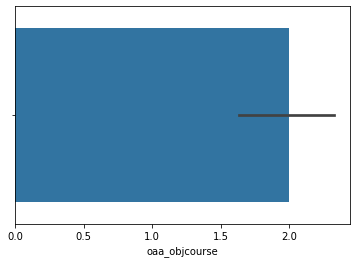

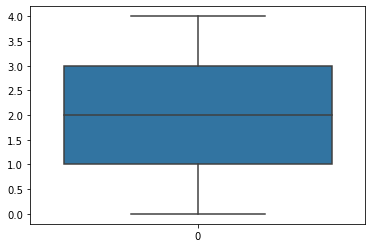

In [102]:
#try:
#    import pandas as pd
#    print('pandas already installed, only imported')
#except:
#    !pip install pandas
#    import pandas as pd
#    print('pandas was not installed, installed and imported')

try:
    import seaborn as sb
    print('seaborn already installed, only imported')
except:
    !pip install seaborn
    import seaborn as sb
    print('seaborn was not installed, installing and importing now')

#creating bar chart and box-plot
barPlot = sb.barplot(x = copy_survey['oaa_objcourse'])
plt.show()


boxPlot = sb.boxplot(data = copy_survey['oaa_objcourse'])
plt.show()

# Appendix

## Appendix 1: Python's CSV Reader

To import data Python has a CSV reader (similar as the file.writer you hopefully remember from C#). To use this, we do need to import Python's library csv.

In [73]:
import csv

Now we can read files using the 'csv.reader'. Since the file is a bit long, I've added a small if statement so it will only show the first ten rows:

In [74]:
with open('MontyPython.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=';')
    i = 0
    for row in csv_reader:
        i = i + 1
        if i < 10:
            print(row)

['Scene', 'textNr', 'Who', 'What']
['1', '1', ' ARTHUR', 'Whoa there!']
['1', '2', ' GUARD #1', 'Halt! Who goes there?']
['1', '3', ' ARTHUR', 'It is I, Arthur, son of Uther Pendragon, from the castle of Camelot. King of the Britons, defeator of the Saxons, sovereign of all England!']
['1', '4', ' GUARD #1', 'Pull the other one!']
['1', '5', ' ARTHUR', 'I am. And this my trusty servant Patsy. We have ridden the length and breadth of the land in search of knights who will join me in my court of Camelot. I must speak with your lord and master.']
['1', '6', ' GUARD #1', 'What, ridden on a horse?']
['1', '7', ' ARTHUR', 'Yes!']
['1', '8', ' GUARD #1', "You're using coconuts!"]


We could of course, store the results in a List:

In [75]:
my_data = []

with open('MontyPython.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=';')
    for row in csv_reader:
        my_data.append(row)

Now we can see the first 10 rows using:

In [76]:
my_data[0:9]

[['Scene', 'textNr', 'Who', 'What'],
 ['1', '1', ' ARTHUR', 'Whoa there!'],
 ['1', '2', ' GUARD #1', 'Halt! Who goes there?'],
 ['1',
  '3',
  ' ARTHUR',
  'It is I, Arthur, son of Uther Pendragon, from the castle of Camelot. King of the Britons, defeator of the Saxons, sovereign of all England!'],
 ['1', '4', ' GUARD #1', 'Pull the other one!'],
 ['1',
  '5',
  ' ARTHUR',
  'I am. And this my trusty servant Patsy. We have ridden the length and breadth of the land in search of knights who will join me in my court of Camelot. I must speak with your lord and master.'],
 ['1', '6', ' GUARD #1', 'What, ridden on a horse?'],
 ['1', '7', ' ARTHUR', 'Yes!'],
 ['1', '8', ' GUARD #1', "You're using coconuts!"]]

There are a lot of options with the csv.reader, but usually another reader is used when importing data. 